First, we need to import libraries. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt 
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
#Das hier einmal aufrufen, wenn ihr mit dem Datensatz weiter arbeiten wollt!

df=pd.read_csv('processed_dataframe.csv',parse_dates=['date','start_time','end_time'])
df=df.drop('Unnamed: 0',axis=1)
df

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,weekday,...,hour,day,month,start_lat,start_lng,end_lat,end_lng,trip_duration_min,start_coordinates,end_coordinates
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,2019-01-01,1,...,0,1,1,41.8915,-87.6268,41.8916,-87.6484,7,"(41.8915, -87.6268)","(41.8916, -87.6484)"
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,2019-01-01,1,...,0,1,1,41.8847,-87.6277,41.8763,-87.6292,8,"(41.8847, -87.6277)","(41.8763, -87.6292)"
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,2019-01-01,1,...,0,1,1,41.8582,-87.6565,41.8686,-87.6862,14,"(41.8582, -87.6565)","(41.8686, -87.6862)"
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,2019-01-01,1,...,0,1,1,41.9227,-87.6972,41.9030,-87.6313,30,"(41.9227, -87.6972)","(41.903, -87.6313)"
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,2019-01-01,1,...,0,1,1,41.8969,-87.6217,41.8923,-87.6120,7,"(41.8969, -87.6217)","(41.8923, -87.612)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3817999,2019-12-31 23:56:13,2020-01-01 00:15:45,112,225,Green St & Randolph St,Halsted St & Dickens Ave,2196,Subscriber,2019-12-31,1,...,23,31,12,41.8837,-87.6487,41.9199,-87.6488,20,"(41.8837, -87.6487)","(41.9199, -87.6488)"
3818000,2019-12-31 23:56:34,2020-01-01 00:22:08,90,90,Millennium Park,Millennium Park,4877,Subscriber,2019-12-31,1,...,23,31,12,41.8810,-87.6241,41.8810,-87.6241,26,"(41.881, -87.6241)","(41.881, -87.6241)"
3818001,2019-12-31 23:57:05,2020-01-01 00:05:46,623,52,Michigan Ave & 8th St,Michigan Ave & Lake St,863,Subscriber,2019-12-31,1,...,23,31,12,41.8728,-87.6240,41.8860,-87.6241,9,"(41.8728, -87.624)","(41.886, -87.6241)"
3818002,2019-12-31 23:57:11,2020-01-01 00:05:45,623,52,Michigan Ave & 8th St,Michigan Ave & Lake St,2637,Subscriber,2019-12-31,1,...,23,31,12,41.8728,-87.6240,41.8860,-87.6241,9,"(41.8728, -87.624)","(41.886, -87.6241)"


## 2.2 Geographical Demand Patterns

### General Demand

In [3]:
start_station_counts = df.groupby('start_station_id').size().reset_index(name='counts')

In [4]:
end_station_counts = df.groupby('end_station_id').size().reset_index(name='counts')

In [5]:
# Sort the start_station_counts DataFrame by the counts column in descending order
start_station_counts = start_station_counts.sort_values(by='counts', ascending=False)

# Select the top-ranked stations (e.g. the top 10 stations)
top_start_stations = start_station_counts.head(10)

# Sort the end_station_counts DataFrame by the counts column in descending order
end_station_counts = end_station_counts.sort_values(by='counts', ascending=False)

# Select the top-ranked stations (e.g. the top 10 stations)
top_end_stations = end_station_counts.head(10)

print(top_start_stations)
print(top_end_stations)

     start_station_id  counts
32                 35   67983
174               192   54389
70                 77   49908
69                 76   49804
80                 91   48153
177               195   39192
40                 43   37696
74                 85   35449
247               268   34472
265               287   34297
     end_station_id  counts
32               35   81723
80               91   50686
174             192   50127
70               77   47311
247             268   42459
69               76   40633
40               43   40331
74               85   37849
79               90   37424
161             177   35939


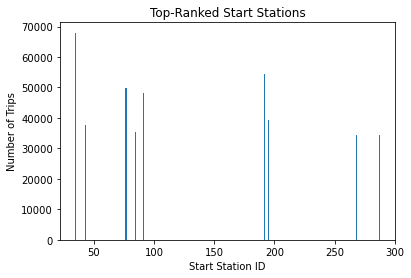

In [6]:
#create a bar plot with the start_station_id on 
#the x-axis and the number of trips on the y-axis, showing the top-ranked 
#start stations based on the number of trips that start at each station.

# Extract the start_station_id and counts columns from the top_start_stations DataFrame
x = top_start_stations['start_station_id']
y = top_start_stations['counts']

# Create a bar plot
plt.bar(x, y)

# Add labels and title
plt.xlabel('Start Station ID')
plt.ylabel('Number of Trips')
plt.title('Top-Ranked Start Stations')

# Show the plot
plt.show()

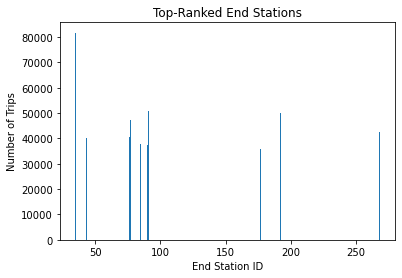

In [7]:
#create a bar plot of the top-ranked end stations:

# Extract the end_station_id and counts columns from the top_end_stations DataFrame
x = top_end_stations['end_station_id']
y = top_end_stations['counts']

# Create a bar plot
plt.bar(x, y)

# Add labels and title
plt.xlabel('End Station ID')
plt.ylabel('Number of Trips')
plt.title('Top-Ranked End Stations')

# Show the plot
plt.show()

In [8]:
# Calculate the correlation between the 'counts' and 'start_latitude' columns
corr = top_start_stations['counts'].corr(top_start_stations['start_station_id'], method='pearson')

# Print the correlation coefficient
print(corr)


-0.5143693823970361


In [9]:
import random
bike_list = df["bike_id"].unique()
selected_bike_ID = random.choice(bike_list)

In [10]:
df["Coordinates"] = list(zip(df["start_lat"],df["start_lng"]))

In [11]:
print(df['Coordinates'].head())


0    (41.8915, -87.6268)
1    (41.8847, -87.6277)
2    (41.8582, -87.6565)
3    (41.9227, -87.6972)
4    (41.8969, -87.6217)
Name: Coordinates, dtype: object


In [12]:
import folium as fm
from folium import plugins


#define new map
#41.8915, -87.6268
#Stamen toner 

#define new map

demand_heat_map = fm.Map(location=(41.8915, -87.6268),tiles='Stamen Toner', 
                       zoom_start=12, control_scale=True, max_zoom=20)

# add heat map

demand_heat_map.add_child(plugins.HeatMap(df[df["bike_id"]==selected_bike_ID]["Coordinates"], radius=20))

#add tilelayers 

fm.TileLayer('stamentoner').add_to(demand_heat_map)
fm.TileLayer('cartodbpositron').add_to(demand_heat_map)
fm.TileLayer('openstreetmap').add_to(demand_heat_map)
fm.LayerControl().add_to(demand_heat_map)

demand_heat_map

display(demand_heat_map)

In [13]:
s_demand_heat_map = fm.Map(location=(41.8915, -87.6268),  tiles='Stamen Watercolor', 
                       zoom_start=12, control_scale=True, max_zoom=20)
#MapBox
#Stamen


# add heat map

s_demand_heat_map.add_child(plugins.HeatMap(df[df["bike_id"]==selected_bike_ID]["Coordinates"], radius=20))

#add tilelayers 

fm.TileLayer('stamentoner').add_to(s_demand_heat_map)
fm.TileLayer('cartodbpositron').add_to(s_demand_heat_map)
fm.TileLayer('openstreetmap').add_to(s_demand_heat_map)
fm.LayerControl().add_to(s_demand_heat_map)

s_demand_heat_map

In [14]:
e_demand_heat_map = fm.Map(location=(41.8915, -87.6268),  tiles='Stamen Terrain', 
                       zoom_start=12, control_scale=True, max_zoom=20)

# add heat map

e_demand_heat_map.add_child(plugins.HeatMap(df[df["bike_id"]==selected_bike_ID]["Coordinates"], radius=20))

#add tilelayers 

fm.TileLayer('stamentoner').add_to(e_demand_heat_map)
fm.TileLayer('cartodbpositron').add_to(e_demand_heat_map)
fm.TileLayer('openstreetmap').add_to(e_demand_heat_map)
fm.LayerControl().add_to(e_demand_heat_map)


e_demand_heat_map

In [15]:
starts = df.drop(df.columns.difference(['start_station_name', 'start_lat', 'start_lng']), 1, inplace=False)
stops = df.drop(df.columns.difference(['end_station_name', 'end_lat', 'end_lng']), 1, inplace=False)
print(starts)
stops = stops.dropna()
print(stops)

                          start_station_name  start_lat  start_lng
0                     Wabash Ave & Grand Ave    41.8915   -87.6268
1                     State St & Randolph St    41.8847   -87.6277
2                       Racine Ave & 18th St    41.8582   -87.6565
3             California Ave & Milwaukee Ave    41.9227   -87.6972
4        Mies van der Rohe Way & Chicago Ave    41.8969   -87.6217
...                                      ...        ...        ...
3817999               Green St & Randolph St    41.8837   -87.6487
3818000                      Millennium Park    41.8810   -87.6241
3818001                Michigan Ave & 8th St    41.8728   -87.6240
3818002                Michigan Ave & 8th St    41.8728   -87.6240
3818003               Broadway & Sheridan Rd    41.9528   -87.6500

[3818004 rows x 3 columns]
                       end_station_name  end_lat  end_lng
0             Milwaukee Ave & Grand Ave  41.8916 -87.6484
1        Dearborn St & Van Buren St (*)  41.8763 -87

In [16]:

_stations_start = starts.groupby(['start_station_name', 'start_lat', 'start_lng'])['start_station_name'].count().reset_index(name='count')
_stations_start.sort_values('count', inplace=True)

_stations_stop = stops.groupby(['end_station_name', 'end_lat', 'end_lng'])['end_station_name'].count().reset_index(name='count')
_stations_stop.sort_values('count', inplace=True)

colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', \
          'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', \
          'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', \
          'black', 'lightgray', 'red', 'blue', 'green', 'purple', \
          'orange', 'darkred', 'lightred', 'beige', 'darkblue', \
          'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'lightblue', \
          'lightgreen', 'gray', 'black', 'lightgray']

In [17]:
startmap = fm.Map(location=[starts.start_lat.mean(), starts.start_lng.mean()],
             zoom_start=10,
             control_scale=True)
_stations_start['marker_color'] = pd.cut(_stations_start['count'], bins= 8, labels=['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige'])
print(_stations_start)

for i, row in _stations_start.iterrows():
    html = f'''Station Name: {row['start_station_name']} <br> Count: {row['count']}'''
    iframe = fm.IFrame(html)

    popup = fm.Popup(iframe, min_width=150, max_width=300)

    fm.Marker(location=[row['start_lat'], row['start_lng']], popup=popup,
                    icon=fm.Icon(color=row['marker_color'])).add_to(startmap)

startmap

                         start_station_name  start_lat  start_lng  count  \
218                  Elizabeth St & 59th St    41.7867   -87.6559      8   
460                    Racine Ave & 61st St    41.7832   -87.6544      9   
398                  Michigan Ave & 71st St    41.7653   -87.6217     11   
93                   Carpenter St & 63rd St    41.7799   -87.6509     13   
259  HUBBARD ST BIKE CHECKING (LBS-WH-TEST)    41.8900   -87.6807     15   
..                                      ...        ...        ...    ...   
156            Clinton St & Washington Blvd    41.8834   -87.6412  48153   
334               Lake Shore Dr & Monroe St    41.8810   -87.6167  49804   
151                 Clinton St & Madison St    41.8822   -87.6411  49908   
85                      Canal St & Adams St    41.8793   -87.6399  54389   
552                 Streeter Dr & Grand Ave    41.8923   -87.6120  67983   

    marker_color  
218          red  
460          red  
398          red  
93         

In [18]:
#adding the coordinates as a tuple:
_stations_start['coordinates']=list(zip(_stations_start['start_lat'],_stations_start['start_lng']))
_stations_stop['coordinates']=list(zip(_stations_stop['end_lat'],_stations_stop['end_lng']))



In [19]:
startmap = fm.Map(location=[starts.start_lat.mean(), starts.start_lng.mean()],
             zoom_start=11,
             control_scale=True)

for i in range(len(_stations_start)):
    radi=_stations_start['count'].iloc[i]/9000
    fm.CircleMarker(location=_stations_start['coordinates'].iloc[i],radius=radi,fill_color='blue').add_to(startmap)
startmap

#### Eine etwas andere art von Heatmap, die Größe des Kreises ist abhängigkeit der häufigkeit. also je größer der Kreis, desto öfters wird die Station benutzt

In [20]:
mostUsedLocations = fm.Map(location=[starts.start_lat.mean(), starts.start_lng.mean()],
             zoom_start=12,
             control_scale=True)

for i in range(len(_stations_start)-10,len(_stations_start),1):
    radi=_stations_start['count'].iloc[i]/7000
    fm.CircleMarker(location=_stations_start['coordinates'].iloc[i],radius=radi,fill_color='blue').add_to(mostUsedLocations)
for i in range(len(_stations_stop)-10,len(_stations_stop),1):
    radi=_stations_stop['count'].iloc[i]/7000
    fm.CircleMarker(location=_stations_stop['coordinates'].iloc[i],radius=radi,fill_color='red',color='red').add_to(mostUsedLocations)


    
mostUsedLocations

#### Die 10 meistbenutzen Start stationen in Blau und die 10 Stationen an denen meistens die fahrt geendet hat in rot. Auch hier die Größe des Kreises hängt direkt im zusammenhang mit der Anzahl der Fahrten die hier gestartet/beendet wurden.

In [21]:
#die 10 meistbenutzten Startstationen:
_stations_start.tail(10)

,start_station_name,start_lat,start_lng,count,marker_color,coordinates
248,Franklin St & Monroe St,41.8803,-87.6352,34297,orange,"(41.8803, -87.6352)"
335,Lake Shore Dr & North Blvd,41.9117,-87.6268,34472,orange,"(41.9117, -87.6268)"
404,Michigan Ave & Oak St,41.9010,-87.6238,35449,orange,"(41.901, -87.6238)"
406,Michigan Ave & Washington St,41.8840,-87.6247,37696,orange,"(41.884, -87.6247)"
158,Columbus Dr & Randolph St,41.8847,-87.6195,39192,orange,"(41.8847, -87.6195)"
156,Clinton St & Washington Blvd,41.8834,-87.6412,48153,darkred,"(41.8834, -87.6412)"
334,Lake Shore Dr & Monroe St,41.8810,-87.6167,49804,darkred,"(41.881, -87.6167)"
151,Clinton St & Madison St,41.8822,-87.6411,49908,darkred,"(41.8822, -87.6411)"
85,Canal St & Adams St,41.8793,-87.6399,54389,lightred,"(41.8793, -87.6399)"
552,Streeter Dr & Grand Ave,41.8923,-87.6120,67983,beige,"(41.8923, -87.612)"


In [22]:
#die 10 meistbenutzten Endstationen:
_stations_stop.tail(10)

,end_station_name,end_lat,end_lng,count,coordinates
554,Theater on the Lake,41.9263,-87.6308,35939,"(41.9263, -87.6308)"
410,Millennium Park,41.8810,-87.6241,37424,"(41.881, -87.6241)"
404,Michigan Ave & Oak St,41.9010,-87.6238,37849,"(41.901, -87.6238)"
406,Michigan Ave & Washington St,41.8840,-87.6247,40331,"(41.884, -87.6247)"
334,Lake Shore Dr & Monroe St,41.8810,-87.6167,40633,"(41.881, -87.6167)"
335,Lake Shore Dr & North Blvd,41.9117,-87.6268,42459,"(41.9117, -87.6268)"
151,Clinton St & Madison St,41.8822,-87.6411,47311,"(41.8822, -87.6411)"
85,Canal St & Adams St,41.8793,-87.6399,50127,"(41.8793, -87.6399)"
156,Clinton St & Washington Blvd,41.8834,-87.6412,50686,"(41.8834, -87.6412)"
552,Streeter Dr & Grand Ave,41.8923,-87.6120,81723,"(41.8923, -87.612)"
